In [1]:
%matplotlib inline

### Test glue_tree from Newick

Change Kernel to `glueviz-dev`.

In [80]:
from config import *

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [81]:
# parse the example Newick

test = read_newick('tmp2.nwk')

for ID in test.component_ids():
    
    print(ID, ':', test[ID])

Pixel Axis 0 [x] : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
World 0 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
parent : [-1  0  0  0  3  3  0  6  6  8  8  0  0 12 12]
names : ['' 'A' 'B' '' 'C' 'D' '' 'E' '' 'F' 'G' 'H' '' 'I' 'J']
size : [0.   0.1  0.2  0.5  0.3  0.4  0.35 0.25 0.4  0.1  0.15 0.25 0.3  0.1
 0.2 ]


In [82]:
# identify the leafness of each structures

leafness = []

for pix in range(len(test['parent'])):
    
    if pix != (len(test['parent'])-1):
        leafness.append('leaf' if (test['parent'][pix] >= test['parent'][pix+1]) else 'branch')
    else:
        leafness.append('leaf')

In [83]:
# identify the direct children of each branch

children = []

idx = np.array(range(len(test['parent'])))

for pix in idx:
    
    if leafness[pix] == 'branch':
        
        child = idx[(test['parent'] == idx[pix])]
        
    else:
        
        child = np.array([])
        
    children.append(child)

In [84]:
# calculate x-positions following astrodendro

x_pos = np.zeros(len(test['parent']))

idx = np.array(range(len(test['parent'])))

## leaves
_cached_pos = 1.
for pix in idx[(np.array(leafness) == 'leaf')]:
    
    x_pos[pix] = _cached_pos
    _cached_pos += 1.
    
    
#nlevels = 5
nlevels = len(set(test['parent']))  ### optimize this.
for level in np.array(range(nlevels)):
    for pix in idx[(np.array(leafness) == 'branch')]:
        
        if x_pos[pix] == 0.:
            
            if np.all(x_pos[children[pix]] != 0.):
                
                x_pos[pix] = np.mean(x_pos[children[pix]])
                
            else:
                
                continue
                
        else:
            
            continue
    

In [85]:
# heights

heights = np.zeros(len(test['parent']))

idx = np.array(range(len(test['parent'])))

for pix in idx:
    
    heights[idx[(test['parent'] == pix)]] += (test['size'][pix] + heights[pix])
    
heights = heights + test['size']

In [86]:
# vertices for vertical lines

verts = []

idx = np.array(range(len(test['parent'])))

for pix in idx:
    
    if test['parent'][pix] == -1:
        
        vert = np.array([[x_pos[pix], 0.],
                         [x_pos[pix], heights[pix]]])
    
    else:
        
        vert = np.array([[x_pos[pix], heights[test['parent'][pix]]],
                         [x_pos[pix], heights[pix]]])
    
    verts.append(vert)
    
    
# vertices for horizontal lines
verts_horiz = []

for pix in idx:
    
    if leafness[pix] == 'branch':
        
        vert = np.array([[x_pos[idx[(test['parent'] == pix)][0]], heights[pix]],
                         [x_pos[idx[(test['parent'] == pix)][-1]], heights[pix]]])
        
    else:
        
        continue
        
    verts_horiz.append(vert)

In [96]:
import matplotlib.cm as cm
import matplotlib.colors as colors

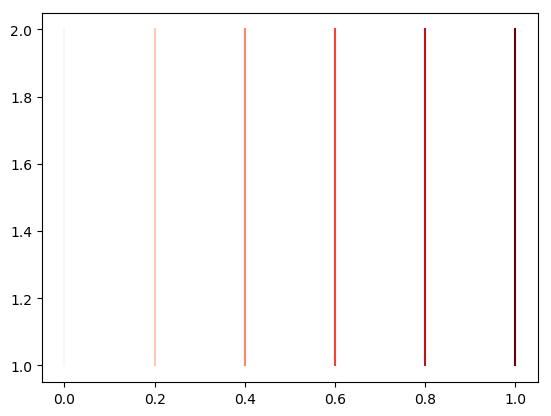

In [108]:
for i in np.array([0., .2, .4, .6, .8, 1.]):

    plt.plot([i, i], [1., 2.],
             color = cm.Reds(i))

In [104]:
colors.Normalize()

(0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0)

In [110]:
[cm.Reds(colors.Normalize(height.min(), height.max())(h)) for h in height]

[(1.0, 0.9607843137254902, 0.9411764705882353, 1.0),
 (0.996555171088043, 0.8884429065743944, 0.8378316032295271, 1.0),
 (0.9901422529796232, 0.7686120722798924, 0.6780930411380238, 1.0),
 (0.9629065743944636, 0.331841599384852, 0.23667820069204154, 1.0),
 (0.6175009611687813, 0.05167243367935409, 0.07853902345251824, 1.0),
 (0.403921568627451, 0.0, 0.05098039215686274, 1.0),
 (0.9878200692041523, 0.5559400230680507, 0.4304498269896194, 1.0),
 (0.8901960784313725, 0.18562091503267975, 0.15294117647058825, 1.0),
 (0.6943944636678201, 0.07003460207612457, 0.09231833910034601, 1.0),
 (0.5107112648981161, 0.025836216839677045, 0.0647597078046905, 1.0),
 (0.403921568627451, 0.0, 0.05098039215686274, 1.0),
 (0.9882352941176471, 0.6967627835447904, 0.5894502114571318, 1.0),
 (0.9882352941176471, 0.6261437908496732, 0.5084967320261438, 1.0),
 (0.9860976547481738, 0.48704344482891193, 0.3615532487504806, 1.0),
 (0.9629065743944636, 0.331841599384852, 0.23667820069204154, 1.0)]

In [115]:
verts_horiz

[array([[1. , 0. ],
        [9.5, 0. ]]), array([[3. , 0.5],
        [4. , 0.5]]), array([[5.  , 0.35],
        [6.5 , 0.35]]), array([[6.  , 0.75],
        [7.  , 0.75]]), array([[ 9. ,  0.3],
        [10. ,  0.3]])]

In [117]:
len(verts_horiz)

5

In [116]:
np.concatenate([verts, verts_horiz]).shape

(20, 2, 2)

In [111]:
lc = LineCollection(verts,
                    linewidths = 5.,
                    colors = [cm.Reds(colors.Normalize(height.min(), height.max())(h)) for h in height],
                    linestyle = 'solid')
lc_horiz = LineCollection(verts_horiz,
                    linewidths = 5.,
                    colors = 'k',
                    linestyle = 'solid')

In [118]:
lc_test = LineCollection(np.concatenate([verts, verts_horiz]),
                    linewidths = 5.,
                    colors = 'k',
                    linestyle = 'solid')

(0.0, 1.0)

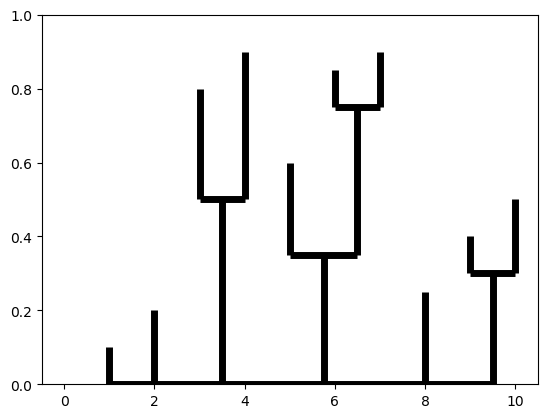

In [119]:
fig = plt.figure()
ax = fig.gca()


ax.add_collection(lc_test)
#ax.add_collection(LineCollection(verts_rot))
#artist.set_data(lc)
#ax.add_collection(lc_horiz)

ax.set_xlim(-.5, 10.5)

ax.set_ylim(0., 1.)

(0.0, 1.0)

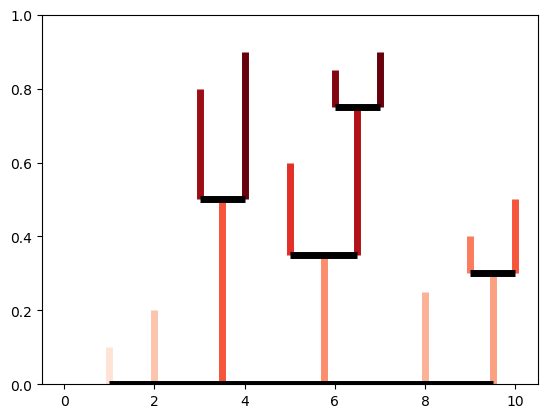

In [112]:
fig = plt.figure()
ax = fig.gca()


ax.add_collection(lc)
ax.add_collection(lc_horiz)
#ax.add_collection(LineCollection(verts_rot))
#artist.set_data(lc)
#ax.add_collection(lc_horiz)

ax.set_xlim(-.5, 10.5)

ax.set_ylim(0., 1.)

#ax.set_yscale('log')

In [ ]:
self.axes.set_yscale('log')

In [78]:
verts_rot = []

for vert in verts:
    
    _cache = np.zeros(vert.shape)
    
    _cache[:, 0] = vert[:, 1]
    _cache[:, 1] = vert[:, 0]
    
    verts_rot.append(_cache)

In [56]:
x, y = x_pos, heights

ids = np.arange(3)

blank = np.zeros(ids.size) * np.nan
x = np.column_stack([x[ids], x[ids + 1],
                     x[ids + 2], blank]).ravel()
y = np.column_stack([y[ids], y[ids + 1],
                     y[ids + 2], blank]).ravel()

In [27]:
import pandas as pd

In [32]:
temp_dict = {'parent': test['parent'],
             'height': heights}

temp_table = pd.DataFrame(temp_dict)
temp_table.to_csv('data/parent_height.csv',
                  index = False)

In [80]:
temp_dict = {'parent': test['parent'],
             'height': heights,
             'prop1': test['size'],
             'prop2': test['size']**2.}

temp_table = pd.DataFrame(temp_dict)
temp_table.to_csv('data/parent_height_properties.csv',
                  index = False)

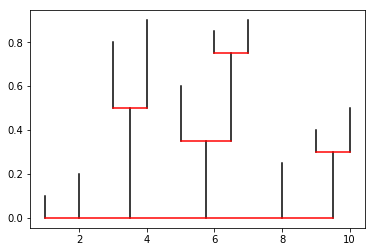

In [33]:
# test plot
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

idx = np.array(range(len(test['parent'])))

for pix in idx:
    
    ax.plot(verts[pix][:, 0],
            verts[pix][:, 1],
            color = 'k')
    
for pix in np.array(range(len(verts_horiz))):
    
    ax.plot(verts_horiz[pix][:, 0],
            verts_horiz[pix][:, 1],
            color = 'r')

____

** generec sort-by function **

kernel: glueviz-dev

In [1]:
%matplotlib inline

In [223]:
import numpy as np
import pandas as pd

def dendro_layout(parent, height, orientation = 'bottom-up'):
    '''
    Summarizing functions that outputs the line collectionself.
    '''

    leafness = calculate_leafness(parent)
    children = calculate_children(parent, leafness)

    xpos = calculate_xpos(parent, leafness, children)
    verts, verts_horiz = calculate_verts(parent, height, leafness, xpos,
                            orientation = orientation)

    # line_collection = LineCollection(verts,
    #                                  colors = 'k',
    #                                  linestyle = 'solid')

    #return line_collection
    return verts, verts_horiz
    #return xpos, height




def calculate_leafness(parent):

    leafness = []


    for idx in range(len(parent)):

        if idx != (len(parent)-1):
            leafness.append('leaf' if (parent[idx] >= parent[idx+1]) else 'branch')
        else:
            leafness.append('leaf')

    return leafness

def calculate_nleaf(parent):

    leafness = calculate_leafness(parent)
    leafness = np.asarray(leafness)

    return np.sum(leafness == 'leaf')

def calculate_children(parent, leafness):

    children = []

    iter_array = np.array(range(len(parent)))

    for idx in iter_array:

        if leafness[idx] == 'branch':
            
            
            print(idx, '---')
            print(leafness[idx])
            print(parent == idx)

            child = iter_array[(parent == idx)]

        else:

            child = np.array([])

        children.append(child)

    return children



########
def calculate_subtree(parent, leafness):

    subtree = []

    iter_array = np.array(range(len(parent)))
    
    nlevels = len(set(parent))
    
    for idx in iter_array:

        if leafness[idx] == 'branch':
            
            parent_own = parent[idx]
            
            if sum((parent == parent_own)) == 1.:
                
                descendent = iter_array[1:]
                
            else:
                
                if sum((parent <= parent_own)&(iter_array > idx)) == 0.:
                    
                    descendent = iter_array[(idx+1):]
                    
                else:
                
                    descendent = iter_array[(idx+1):
                                            iter_array[np.where((parent <= parent_own)&(iter_array > idx))][0]]
            

        else:

            descendent = np.array([])

        subtree.append(descendent)

    return subtree


######


def calculate_xpos(parent, leafness, children):

    x_pos = np.zeros(len(parent))

    iter_array = np.array(range(len(parent)))

    ## leaves
    _cached_pos = 1.
    for idx in iter_array[(np.array(leafness) == 'leaf')]:

        x_pos[idx] = _cached_pos
        _cached_pos += 1.


    ## branches
    #nlevels = 5
    nlevels = len(set(parent))  ### optimize this.
    for level in np.array(range(nlevels)):
        for idx in iter_array[(np.array(leafness) == 'branch')]:

            if x_pos[idx] == 0.:
                if np.all(x_pos[children[idx]] != 0.):
                    x_pos[idx] = np.mean(x_pos[children[idx]])

                else:
                    continue

            else:
                continue

    return x_pos



def calculate_verts(parent, height, leafness, x_pos, orientation = 'bottom-up'):

    verts = []

    iter_array = np.array(range(len(parent)))

    # vertices for vertical lines
    for idx in iter_array:

        if parent[idx] == -1:

            vert = np.array([[x_pos[idx], 0.],
                             [x_pos[idx], height[idx]]])

        else:

            vert = np.array([[x_pos[idx], height[parent[idx]]],
                             [x_pos[idx], height[idx]]])

        verts.append(vert)


    verts_horiz = []

    # vertices for horizontal lines
    for idx in iter_array:

        if leafness[idx] == 'branch':

            vert = np.array([[x_pos[iter_array[(parent == idx)][0]], height[idx]],
                             [x_pos[iter_array[(parent == idx)][-1]], height[idx]]])

        else:

            continue

        verts_horiz.append(vert)


    if (orientation == 'bottom-up') or (orientation == 'top-down'):
        return verts, verts_horiz

    elif (orientation == 'left-right') or (orientation == 'right-left'):

        verts_rot = []

        for vert in verts:

            _cache = np.zeros(vert.shape)

            _cache[:, 0] = vert[:, 1]
            _cache[:, 1] = vert[:, 0]

            verts_rot.append(_cache)

        verts_horiz_rot = []

        for vert in verts_horiz:

            _cache = np.zeros(vert.shape)

            _cache[:, 0] = vert[:, 1]
            _cache[:, 1] = vert[:, 0]

            verts_horiz_rot.append(_cache)

        return verts_rot, verts_horiz_rot

In [139]:
df = pd.read_csv('data/parent_height_properties.csv')
parent = df['parent'].values
height = df['height'].values

leafness = calculate_leafness(parent)
children = calculate_children(parent, leafness)

In [256]:
def sort1Darrays(parent, height, sortby_array):

    #####sortby_array = height

    #
    leafness = calculate_leafness(parent)
    subtree = calculate_subtree(parent, leafness)


    ####
    iter_array = np.array(range(len(parent)))

    iter_array_updated = iter_array.copy()
    parent_updated = parent.copy()

    for idx in iter_array:


        if sum((parent == idx)) > 0.:


            args_0 = iter_array[parent == idx]
            sortby = sortby_array[parent == idx]
            args_sorted = args_0[np.argsort(sortby)]

            idx_j = np.where(iter_array_updated == idx)[0][0]


            for jdx in args_sorted:



                iter_array_updated[(idx_j+1)] = jdx
                parent_updated[(idx_j+1)] = np.where(iter_array_updated == idx)[0][0]

                descendent = subtree[jdx]
                if len(descendent) > 0.:

                    iter_array_updated[(idx_j+2):(idx_j+2+len(descendent))] = descendent
                    parent_updated[(idx_j+2):(idx_j+2+len(descendent))] = parent[descendent] + ((idx_j+1)-jdx)



                idx_j = idx_j + (1+len(descendent))




        else:
            continue




    #parent_updated = parent[iter_array_updated]
    height_updated = height[iter_array_updated]


    return parent_updated, height_updated

In [258]:
test = sort1Darrays(parent, height, height)

In [261]:
test[1]

array([0.  , 0.1 , 0.2 , 0.25, 0.3 , 0.4 , 0.5 , 0.35, 0.6 , 0.75, 0.85,
       0.9 , 0.5 , 0.8 , 0.9 ])

In [262]:
height_updated

array([0.  , 0.1 , 0.2 , 0.25, 0.3 , 0.4 , 0.5 , 0.35, 0.6 , 0.75, 0.85,
       0.9 , 0.5 , 0.8 , 0.9 ])

In [253]:
#### developing


sortby_array = height

#
subtree = calculate_subtree(parent, leafness)


####
iter_array = np.array(range(len(parent)))

iter_array_updated = iter_array.copy()
parent_updated = parent.copy()

for idx in iter_array:
    
    
    if sum((parent == idx)) > 0.:
        
        print(idx, '---')
        
    
        args_0 = iter_array[parent == idx]
        sortby = sortby_array[parent == idx]
        args_sorted = args_0[np.argsort(sortby)]
        
        idx_j = np.where(iter_array_updated == idx)[0][0]
        
        print(args_sorted)
        
        for jdx in args_sorted:
            
            print('idx_j', idx_j)
            print('jdx', jdx)
            
            #print((iter_array_updated == idx))
            
            iter_array_updated[(idx_j+1)] = jdx
            parent_updated[(idx_j+1)] = np.where(iter_array_updated == idx)[0][0]
            
            descendent = subtree[jdx]
            if len(descendent) > 0.:
                #print('in', ((idx_j+1)-jdx))
                iter_array_updated[(idx_j+2):(idx_j+2+len(descendent))] = descendent
                parent_updated[(idx_j+2):(idx_j+2+len(descendent))] = parent[descendent] + ((idx_j+1)-jdx)
                print(parent_updated)
            
            
            idx_j = idx_j + (1+len(descendent))
            
            print(iter_array_updated)
            print(parent_updated)
            print('idx_j', idx_j)
            print('=====')
        
    
    
    else:
        continue
        
    
#print(parent_updated)    
        
#parent_updated = parent[iter_array_updated]
height_updated = height[iter_array_updated]

0 ---
[ 1  2 11 12  6  3]
idx_j 0
jdx 1
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[-1  0  0  0  3  3  0  6  6  8  8  0  0 12 12]
idx_j 1
=====
idx_j 1
jdx 2
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[-1  0  0  0  3  3  0  6  6  8  8  0  0 12 12]
idx_j 2
=====
idx_j 2
jdx 11
[ 0  1  2 11  4  5  6  7  8  9 10 11 12 13 14]
[-1  0  0  0  3  3  0  6  6  8  8  0  0 12 12]
idx_j 3
=====
idx_j 3
jdx 12
[-1  0  0  0  0  4  4  6  6  8  8  0  0 12 12]
[ 0  1  2 11 12 13 14  7  8  9 10 11 12 13 14]
[-1  0  0  0  0  4  4  6  6  8  8  0  0 12 12]
idx_j 6
=====
idx_j 6
jdx 6
[-1  0  0  0  0  4  4  0  7  7  9  9  0 12 12]
[ 0  1  2 11 12 13 14  6  7  8  9 10 12 13 14]
[-1  0  0  0  0  4  4  0  7  7  9  9  0 12 12]
idx_j 11
=====
idx_j 11
jdx 3
[-1  0  0  0  0  4  4  0  7  7  9  9  0 12 12]
[ 0  1  2 11 12 13 14  6  7  8  9 10  3  4  5]
[-1  0  0  0  0  4  4  0  7  7  9  9  0 12 12]
idx_j 14
=====
3 ---
[4 5]
idx_j 12
jdx 4
[ 0  1  2 11 12 13 14  6  7  8  9 10  3  4  5]
[-1  0  0  0  0  4  4 

In [249]:
(iter_array_updated == idx)

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False])

In [250]:
iter_array_updated

array([ 0,  1,  2, 11, 12, 13, 14,  6,  7,  8,  9, 10,  3,  4,  5])

In [254]:
parent_updated

array([-1,  0,  0,  0,  0,  4,  4,  0,  7,  7,  9,  9,  0, 12, 12])

In [224]:
leafness_updated = calculate_leafness(parent_updated)
children_updated = calculate_children(parent_updated, leafness_updated)

0 ---
branch
[False  True  True  True  True False False  True False False False False
  True False False]
4 ---
branch
[False False False False False False False False False False False False
 False False False]
7 ---
branch
[False False False False False False False False False False False False
 False False False]
9 ---
branch
[False False False False False False False False False False False False
 False False False]
12 ---
branch
[False False False False False  True  True False False False False False
 False False False]


In [225]:
leafness_updated

['branch',
 'leaf',
 'leaf',
 'leaf',
 'branch',
 'leaf',
 'leaf',
 'branch',
 'leaf',
 'branch',
 'leaf',
 'leaf',
 'branch',
 'leaf',
 'leaf']

In [214]:
parent_updated

array([-1,  0,  0,  0,  0, 12, 12,  0,  6,  6,  8,  8,  0,  3,  3])

In [213]:
calculate_children(parent_updated)

['branch',
 'leaf',
 'leaf',
 'leaf',
 'branch',
 'leaf',
 'leaf',
 'branch',
 'leaf',
 'branch',
 'leaf',
 'leaf',
 'branch',
 'leaf',
 'leaf']

In [212]:
dendro_layout(parent_updated, height_updated)

//anaconda/envs/glueviz-dev/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [263]:
None is None

True

0 ---
branch
[False  True  True  True  True False False  True False False False False
  True False False]
4 ---
branch
[False False False False False  True  True False False False False False
 False False False]
7 ---
branch
[False False False False False False False False  True  True False False
 False False False]
9 ---
branch
[False False False False False False False False False False  True  True
 False False False]
12 ---
branch
[False False False False False False False False False False False False
 False  True  True]


(-0.05, 1.5)

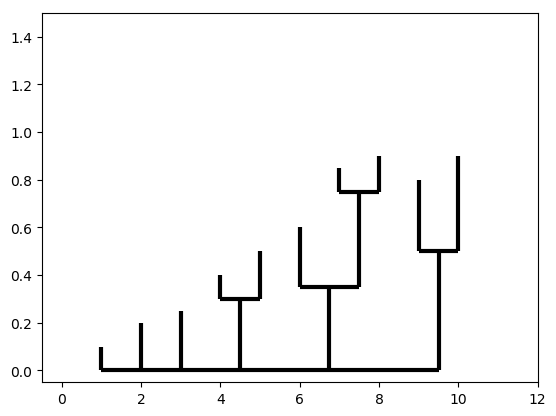

In [255]:
test_results = dendro_layout(parent_updated, height_updated)

fig = plt.figure()
ax = fig.gca()

ax.add_collection(LineCollection(np.concatenate([test_results[0], test_results[1]]),
                                 colors = 'k',
                                 linewidths = 3.))


ax.set_xlim(-.5, 12.)
ax.set_ylim(-.05, 1.5)

(-0.05, 1.5)

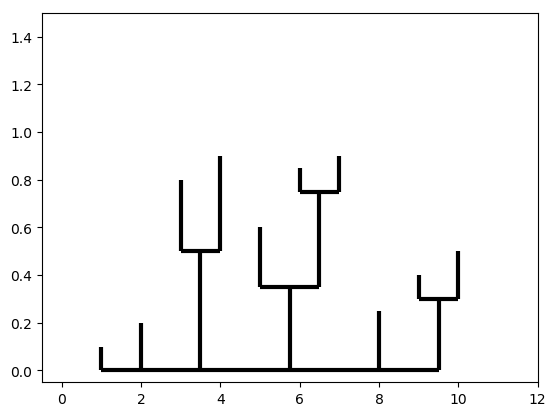

In [150]:
test_results = dendro_layout(parent, height)

fig = plt.figure()
ax = fig.gca()

ax.add_collection(LineCollection(np.concatenate([test_results[0], test_results[1]]),
                                 colors = 'k',
                                 linewidths = 3.))


ax.set_xlim(-.5, 12.)
ax.set_ylim(-.05, 1.5)

In [202]:
parent

array([-1,  0,  0,  0,  3,  3,  0,  6,  6,  8,  8,  0,  0, 12, 12])

In [201]:
test

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([4, 5]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([ 7,  8,  9, 10]),
 array([], dtype=float64),
 array([ 9, 10, 11, 12, 13, 14]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([13, 14]),
 array([], dtype=float64),
 array([], dtype=float64)]

______
### Test astrodendro

Change Kernel to the default.

In [2]:
import numpy as np

from astropy.io import fits
from astrodendro import Dendrogram
import matplotlib.pyplot as plt
#import matplotlib.patches as patches

In [2]:
!ls data

obsvL1689_AV.fits obsvL1689_AV.hdf5


In [3]:
data = fits.open('data/obsvL1689_AV.fits')
dendro = Dendrogram.load_from('data/obsvL1689_AV.hdf5')

p_dendro = dendro.plotter()
paths = p_dendro.get_lines().get_paths()

//anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
paths[0].vertices

array([[1.6484375 , 7.14289618],
       [1.6484375 , 7.95219183]])

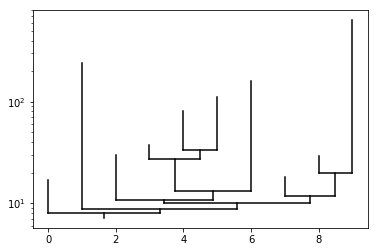

In [4]:
fig = plt.figure()
ax = fig.gca()

for pix in np.array(range(len(paths))):
    
    vert = paths[pix].vertices
    
    ax.plot(vert[:, 0],
            vert[:, 1],
            color = 'k')
    
    
ax.set_yscale('log')

In [11]:
test = dendro[5]

In [12]:
test.get_peak()

((278, 498), 111.96282958984375)

In [13]:
test.height

27.00306510925293